# Infrared Object Detection - Sensor Data Analysis

This notebook demonstrates basic analysis of sensor data from the IR sensor and point cloud generator.

## Overview
- Visualize simulated sensor readings
- Analyze detection patterns
- Plot point cloud distributions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Simulate IR sensor readings over time
np.random.seed(42)  # For reproducibility

# Generate 100 sensor readings
num_readings = 100
time = np.linspace(0, 10, num_readings)  # 10 seconds

# Simulate object at varying distances with noise
true_distance = 1.5 + 0.5 * np.sin(0.5 * time)  # Object moving back and forth
noise = np.random.normal(0, 0.02, num_readings)  # 2cm noise
measured_distance = true_distance + noise

# Clip to sensor range
measured_distance = np.clip(measured_distance, 0.1, 3.0)

print(f"Generated {num_readings} simulated IR sensor readings")
print(f"Distance range: {measured_distance.min():.2f}m to {measured_distance.max():.2f}m")

Generated 100 simulated IR sensor readings
Distance range: 0.97m to 2.04m


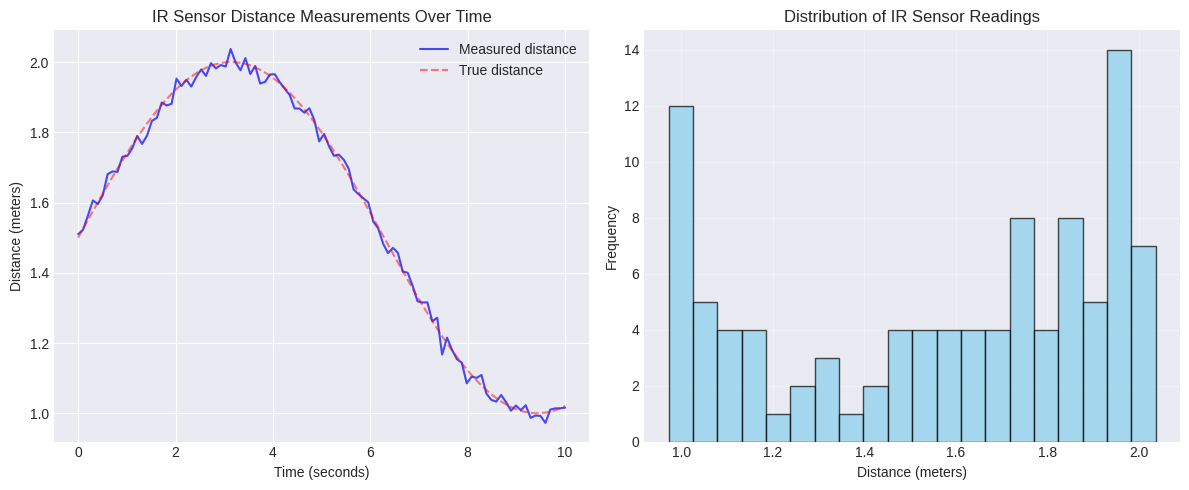

IR sensor analysis complete!


In [4]:
# Plot IR sensor readings over time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time, measured_distance, 'b-', alpha=0.7, label='Measured distance')
plt.plot(time, true_distance, 'r--', alpha=0.5, label='True distance')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('IR Sensor Distance Measurements Over Time')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(measured_distance, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.title('Distribution of IR Sensor Readings')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("IR sensor analysis complete!")

In [5]:
# Generate a simulated point cloud scene
def generate_sample_pointcloud(num_points=500):
    """Generate a sample point cloud with ground plane and object"""
    
    # Ground plane points
    ground_x = np.random.uniform(-2, 2, num_points//2)
    ground_y = np.random.uniform(-2, 2, num_points//2)
    ground_z = np.zeros(num_points//2)
    ground = np.column_stack([ground_x, ground_y, ground_z])
    
    # Object points (cube at 1.5m distance)
    obj_points = num_points//2
    obj_x = np.random.uniform(1.3, 1.7, obj_points)
    obj_y = np.random.uniform(-0.3, 0.3, obj_points)
    obj_z = np.random.uniform(0.3, 0.7, obj_points)
    obj = np.column_stack([obj_x, obj_y, obj_z])
    
    # Combine
    pointcloud = np.vstack([ground, obj])
    
    return pointcloud

# Generate point cloud
pc = generate_sample_pointcloud(1000)
print(f"Generated point cloud with {len(pc)} points")
print(f"X range: [{pc[:, 0].min():.2f}, {pc[:, 0].max():.2f}]")
print(f"Y range: [{pc[:, 1].min():.2f}, {pc[:, 1].max():.2f}]")
print(f"Z range: [{pc[:, 2].min():.2f}, {pc[:, 2].max():.2f}]")

Generated point cloud with 1000 points
X range: [-1.98, 2.00]
Y range: [-1.98, 1.99]
Z range: [0.00, 0.70]


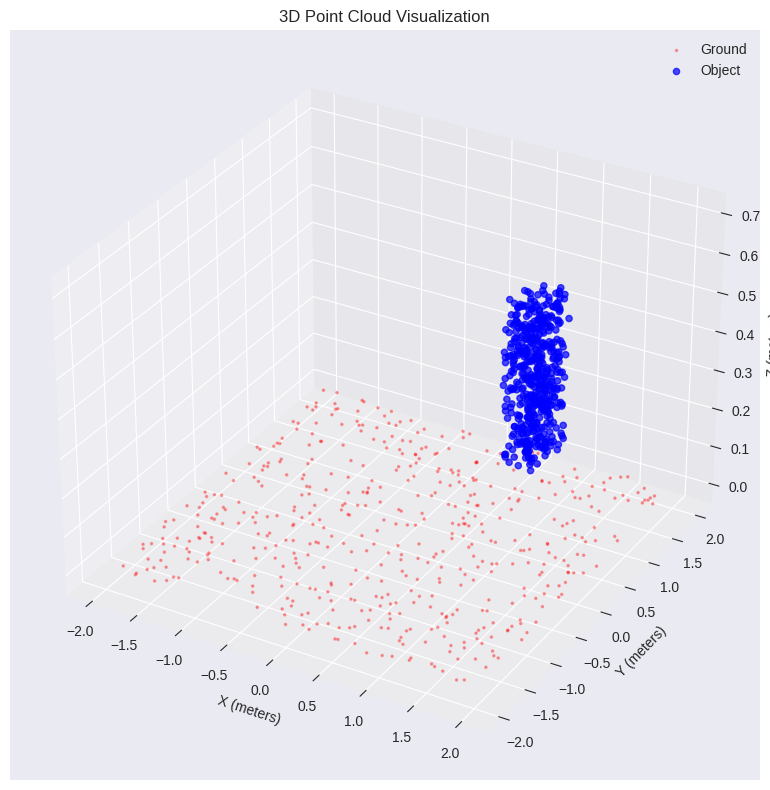

3D visualization complete!


In [6]:
# Visualize the point cloud in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate ground and elevated points
ground_points = pc[pc[:, 2] < 0.1]
object_points = pc[pc[:, 2] >= 0.1]

# Plot ground (red) and object (blue)
ax.scatter(ground_points[:, 0], ground_points[:, 1], ground_points[:, 2], 
           c='red', marker='.', s=10, alpha=0.3, label='Ground')
ax.scatter(object_points[:, 0], object_points[:, 1], object_points[:, 2], 
           c='blue', marker='o', s=20, alpha=0.7, label='Object')

ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_zlabel('Z (meters)')
ax.set_title('3D Point Cloud Visualization')
ax.legend()

plt.tight_layout()
plt.show()

print("3D visualization complete!")

## Summary

This notebook demonstrated:
- IR sensor data simulation and visualization
- Point cloud generation and analysis
- 3D visualization techniques

These tools can be used to analyze real sensor data from the ROS 2 system by recording topics to files and loading them here for offline analysis.